In [1]:
%matplotlib inline
import pandas as pd
import os.path
import glob

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:

oldpath ='../data/2204324/oldFormat' 
allFiles = glob.glob(os.path.join(oldpath, "*.txt"))

In [4]:
#loading all files
df_from_each_file = (pd.read_csv(f)[['ref','dateOperation','libelleOperation','montantCredit', 'montantDebit','montantSolde']] for f in allFiles)
oldDFs   = pd.concat(df_from_each_file, ignore_index=True)
#cleaning data
oldDFs = oldDFs.replace(to_replace='<null>', value=0)
oldDFs[['montantCredit','montantDebit', 'montantSolde']] = oldDFs[['montantCredit','montantDebit', 'montantSolde']].apply(pd.to_numeric)
oldDFs['dateOperation'] = pd.to_datetime(oldDFs['dateOperation'])
oldDFs['montant'] = oldDFs['montantCredit'] - oldDFs['montantDebit']
del oldDFs['montantCredit']
del oldDFs['montantDebit']
oldDFs.head(15)

,ref,dateOperation,libelleOperation,montantSolde,montant
0,0P0888,2016-11-17,RETRAIT GAB CASA PORT VILLE DE CASABLANCA HEUR...,345065.26,-2000.00
1,387900,2016-11-22,ACHAT PAR CARTE DE PAIEMENT CHEZ SYMONEA TANGER,342745.26,-320.00
2,0C6437,2016-11-22,RETRAIT GAB HASSANIA VILLE DE MOHAMMEDIA HEURE...,342745.26,-2000.00
3,0V5563,2016-11-27,RETRAIT GAB HASSANIA VILLE DE MOHAMMEDIA HEURE...,340745.26,-2000.00
4,700009,2016-11-29,RETRAIT GAB EFFECTUE CHEZ MARJANE MOHAMEDIA,337482.64,-2000.00
5,700009,2016-11-29,COMMISSION,337482.64,-6.00
6,993441,2016-11-29,ACHAT PAR CARTE DE PAIEMENT CHEZ MARJANE MOHAM...,337482.64,-448.62
7,658684,2016-11-29,ACHAT PAR CARTE DE PAIEMENT CHEZ BRICOMA MOHAM...,337482.64,-143.00
8,463398,2016-11-29,ACHAT PAR CARTE DE PAIEMENT CHEZ DECATHLON MOH...,337482.64,-665.00
9,216897,2016-11-30,TAXE SUR VALEUR AJOUTEE,335360.14,-1.50


In [5]:
oldDFs.describe(include = 'all')

,ref,dateOperation,libelleOperation,montantSolde,montant
count,505,505,505,505.000000,505.000000
unique,387,239,169,NaN,NaN
top,121167,2016-05-09 23:00:00,COMMISSION,NaN,NaN
freq,31,15,64,NaN,NaN
first,NaN,2015-12-07 00:00:00,NaN,NaN,NaN
last,NaN,2017-05-18 23:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,298804.202277,164.545941
std,NaN,NaN,NaN,48899.251142,6943.820031
min,NaN,NaN,NaN,186202.470000,-80000.000000
25%,NaN,NaN,NaN,285307.330000,-2000.000000


In [6]:
c = oldDFs
c['annee'] = c.dateOperation.dt.year
c['mois'] = c.dateOperation.dt.month
c['jour'] = c.dateOperation.dt.day
c.head()

,ref,dateOperation,libelleOperation,montantSolde,montant,annee,mois,jour
0,0P0888,2016-11-17,RETRAIT GAB CASA PORT VILLE DE CASABLANCA HEUR...,345065.26,-2000.0,2016,11,17
1,387900,2016-11-22,ACHAT PAR CARTE DE PAIEMENT CHEZ SYMONEA TANGER,342745.26,-320.0,2016,11,22
2,0C6437,2016-11-22,RETRAIT GAB HASSANIA VILLE DE MOHAMMEDIA HEURE...,342745.26,-2000.0,2016,11,22
3,0V5563,2016-11-27,RETRAIT GAB HASSANIA VILLE DE MOHAMMEDIA HEURE...,340745.26,-2000.0,2016,11,27
4,700009,2016-11-29,RETRAIT GAB EFFECTUE CHEZ MARJANE MOHAMEDIA,337482.64,-2000.0,2016,11,29


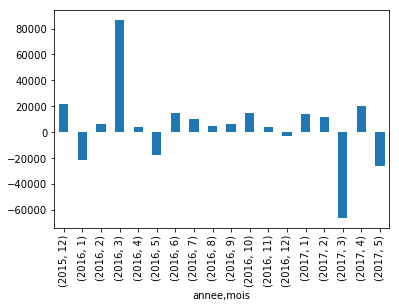

In [7]:
g = c.groupby(['annee', 'mois']).montant.sum()
g.plot(kind='bar')
#g

In [8]:
path ='../data/2204324' 
all_files = glob.glob(os.path.join(path, "*.txt"))
#for file_ in all_files:
#    print(file_)

In [9]:
#loading all new files
df_from_file = (pd.read_csv(fle)[['RefOpe','Dateope','LibOpe','Montant', 'SldFin', 'DateSoldeFin']] for fle in all_files)
newDFs   = pd.concat(df_from_file, ignore_index=True)
#cleaning data
newDFs[['Montant','SldFin']] = newDFs[['Montant','SldFin']].apply(pd.to_numeric)
newDFs['Dateope'] = pd.to_datetime(newDFs['Dateope'], format="%Y%m%d")
del newDFs['DateSoldeFin'] # = pd.to_datetime(newDFs['DateSoldeFin'], format="%Y%m%d")
newDFs.rename(columns={'Dateope': 'dateOperation', 'RefOpe': 'ref', 'Montant': 'montant', 'LibOpe': 'libelleOperation', 'SldFin': 'montantSolde'}, inplace=True)

newDFs.head(15)

,ref,dateOperation,libelleOperation,montant,montantSolde
0,642063,2017-07-26,VIREMENT EN VOTRE FAVEUR DE OCTO TECHNOLOGY ...,32000.00,309413.62
1,500009,2017-07-25,RETRAIT GAB EFFECTUE CHEZ TOTAL ATLANTIQUE ...,-2000.00,277413.62
2,500009,2017-07-25,COMMISSION ...,-6.00,277413.62
3,0U9451,2017-07-22,RETRAIT GAB MEDIEK VILLE DE MEDIEK HEURE : 22:...,-2000.00,279419.62
4,600006,2017-07-18,RETRAIT GAB EFFECTUE CHEZ CASA ROUDANI ...,-2000.00,281419.62
5,600006,2017-07-18,COMMISSION ...,-6.00,281419.62
6,0N5343,2017-07-18,RETRAIT GAB AL MAHATTA VILLE DE MOHAMMEDIA HEU...,-2000.00,281419.62
7,969493,2017-07-17,ORDRE DE VIREMENT EN FAVEUR DE MR OMAR EL AIBI...,-800.00,285425.62
8,603973,2017-07-11,ACHAT PAR CARTE DE PAIEMENT CHEZ ASWAK ASSALAM...,-1007.86,286225.62
9,250037,2017-07-07,VERSEMENT EFFECTUE PAR KAILY SAMIR BB 56653 ...,1200.00,287233.48


In [10]:
newDFs.describe(include = 'all')

,ref,dateOperation,libelleOperation,montant,montantSolde
count,632,632,632,632.000000,632.000000
unique,199,124,101,NaN,NaN
top,121167,2017-09-05 00:00:00,COMMISSION ...,NaN,NaN
freq,30,28,66,NaN,NaN
first,NaN,2017-03-20 00:00:00,NaN,NaN,NaN
last,NaN,2018-01-12 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,276.070063,309275.871582
std,NaN,NaN,NaN,5976.920122,33953.451095
min,NaN,NaN,NaN,-7000.000000,258596.980000
25%,NaN,NaN,NaN,-2000.000000,288023.190000


In [12]:
newDFs['annee'] = newDFs.dateOperation.dt.year
newDFs['mois'] = newDFs.dateOperation.dt.month
newDFs['jour'] = newDFs.dateOperation.dt.day
newDFs.head()

,ref,dateOperation,libelleOperation,montant,montantSolde,annee,mois,jour
0,642063,2017-07-26,VIREMENT EN VOTRE FAVEUR DE OCTO TECHNOLOGY ...,32000.0,309413.62,2017,7,26
1,500009,2017-07-25,RETRAIT GAB EFFECTUE CHEZ TOTAL ATLANTIQUE ...,-2000.0,277413.62,2017,7,25
2,500009,2017-07-25,COMMISSION ...,-6.0,277413.62,2017,7,25
3,0U9451,2017-07-22,RETRAIT GAB MEDIEK VILLE DE MEDIEK HEURE : 22:...,-2000.0,279419.62,2017,7,22
4,600006,2017-07-18,RETRAIT GAB EFFECTUE CHEZ CASA ROUDANI ...,-2000.0,281419.62,2017,7,18


In [13]:
#concat old & new DF
newDFs   = pd.concat([newDFs, c], ignore_index=True)

In [14]:
newDFs.head()

,annee,dateOperation,jour,libelleOperation,mois,montant,montantSolde,ref
0,2017,2017-07-26,26,VIREMENT EN VOTRE FAVEUR DE OCTO TECHNOLOGY ...,7,32000.0,309413.62,642063
1,2017,2017-07-25,25,RETRAIT GAB EFFECTUE CHEZ TOTAL ATLANTIQUE ...,7,-2000.0,277413.62,500009
2,2017,2017-07-25,25,COMMISSION ...,7,-6.0,277413.62,500009
3,2017,2017-07-22,22,RETRAIT GAB MEDIEK VILLE DE MEDIEK HEURE : 22:...,7,-2000.0,279419.62,0U9451
4,2017,2017-07-18,18,RETRAIT GAB EFFECTUE CHEZ CASA ROUDANI ...,7,-2000.0,281419.62,600006


In [15]:
# remove duplicate rows
newDFs = newDFs.drop_duplicates(subset=['ref', 'montant'])

Current size: [15.0, 6.0]


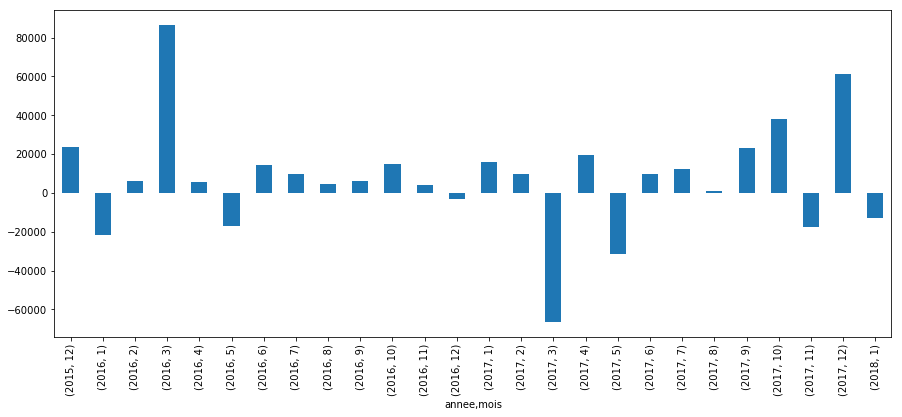

In [29]:
import matplotlib.pyplot as plt
 
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: 
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

gn = newDFs.groupby(['annee', 'mois']).montant.sum()
gn.plot(kind='bar')

In [19]:
newDFs[newDFs.ref == '642063']

,annee,dateOperation,jour,libelleOperation,mois,montant,montantSolde,ref
0,2017,2017-07-26,26,VIREMENT EN VOTRE FAVEUR DE OCTO TECHNOLOGY ...,7,32000.0,309413.62,642063


In [32]:
newDFs.to_csv('../data/2204324/allData.csv' , sep=',', encoding='utf-8', index=False)

In [ ]:
c = c[(c.mois==8) & (c.SensOpe == 'D') & (c.jour>17)]
pd.set_option('display.max_colwidth', -1)
c[['jour', 'LibOpe', 'Montant']]
